In [70]:
#Load needed libraries
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the tables 
covid_df = pd.read_csv('../data/covid.csv', index_col=False)
precovid_df = pd.read_csv('../data/precovid.csv', index_col=False)
postcovid_df = pd.read_csv('../data/postcovid.csv', index_col=False)

### Forward Elimination Feature Selection

In [57]:
def forward_elimination_feature_selection(inp_df):
    input_df = inp_df.drop(columns={'Number of Workers','percent_layoff','Unnamed: 0'})
    X = input_df
    y = inp_df['Number of Workers']

    #Define Sequential Forward Selection (sfs)
    sfs = SFS(LinearRegression(),
            k_features=57,
            forward=True,
            floating=False,
            scoring = 'r2',
            cv = 0)
    #Use SFS to select the top 5 features 
    sfs.fit(X, y)

    #Create a dataframe for the SFS results 
    df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
    
    #plot
    fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(25,10))
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()
    return df_SFS_results

/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


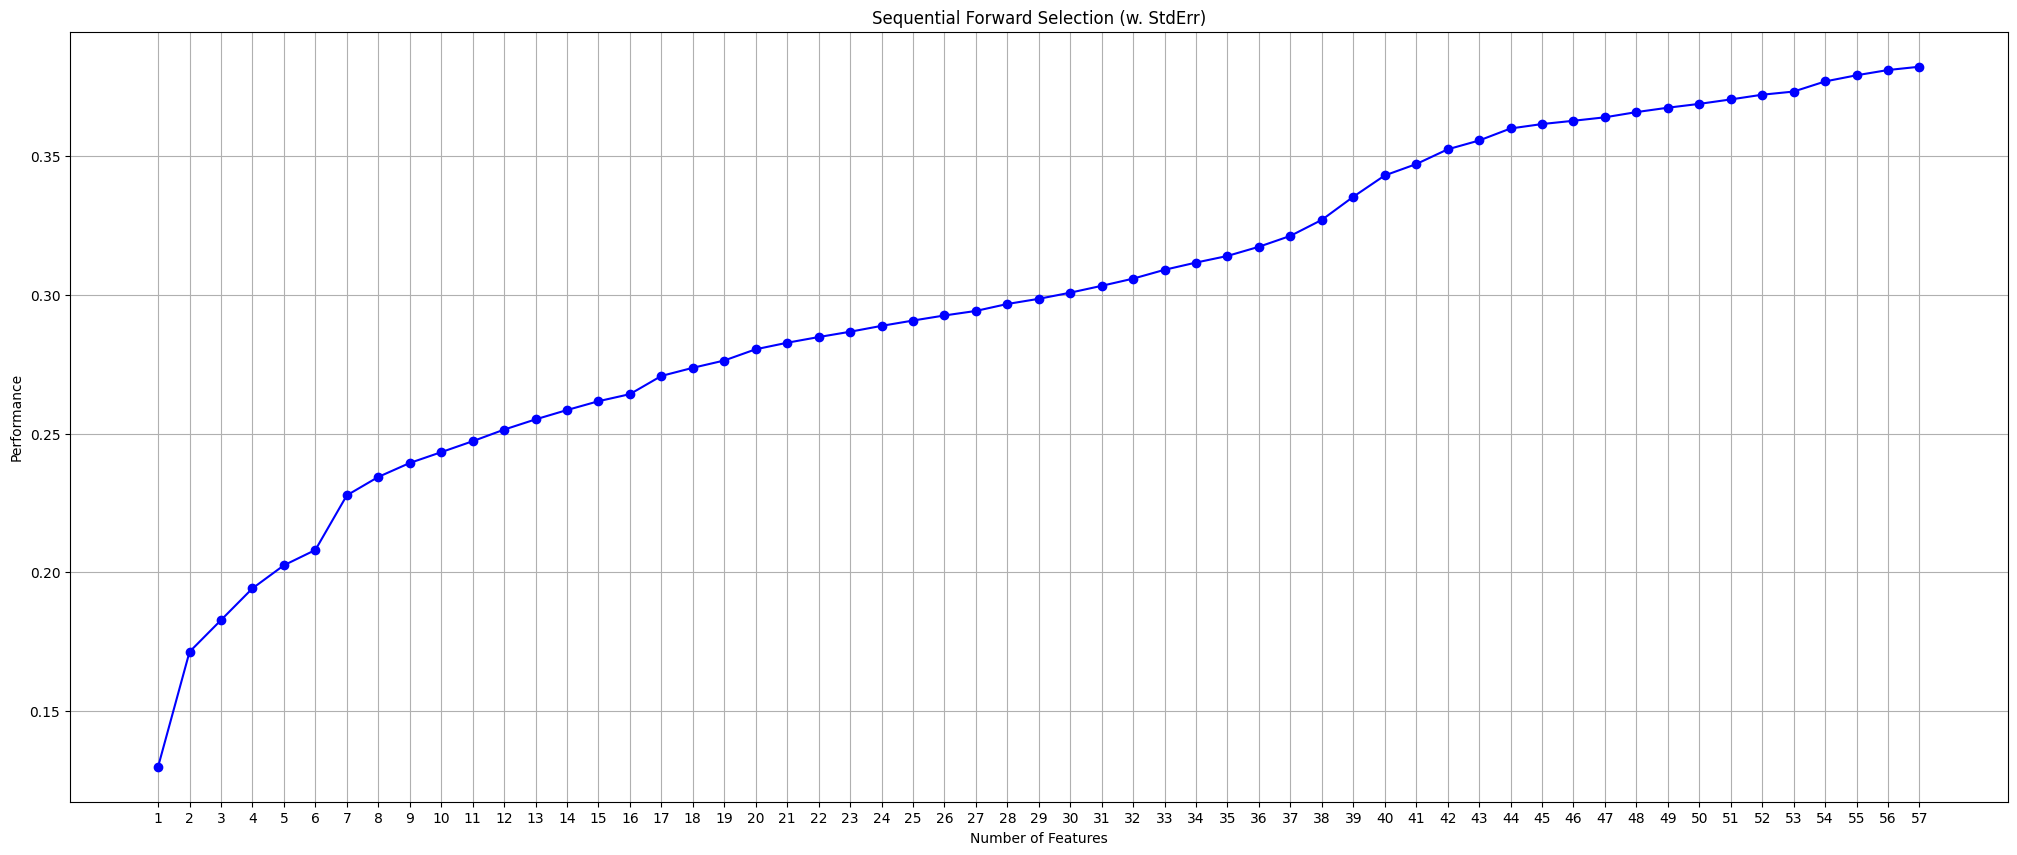

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.12991232970209143],0.129912,"(Number of Layoffs,)"
2,"(2, 26)",[0.17134988704127074],0.17135,"(Number of Layoffs, EPSDiluted)"
3,"(2, 26, 86)",[0.18278179243171633],0.182782,"(Number of Layoffs, EPSDiluted, commonStockIss..."
4,"(2, 26, 38, 86)",[0.19422235669834054],0.194222,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
5,"(2, 26, 38, 69, 86)",[0.20254575826669685],0.202546,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
6,"(2, 26, 38, 60, 69, 86)",[0.20806218301984625],0.208062,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
7,"(2, 26, 38, 60, 69, 85, 86)",[0.22776148978210864],0.227761,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
8,"(2, 26, 38, 60, 69, 85, 86, 99)",[0.23439382697193734],0.234394,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
9,"(2, 26, 38, 60, 69, 85, 86, 94, 99)",[0.2394255884507388],0.239426,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
10,"(2, 26, 38, 60, 62, 69, 85, 86, 94, 99)",[0.24332528936944686],0.243325,"(Number of Layoffs, EPSDiluted, intangibleAsse..."


In [58]:
df_SFS_precovid_results = forward_elimination_feature_selection(precovid_df)
df_SFS_precovid_results

/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


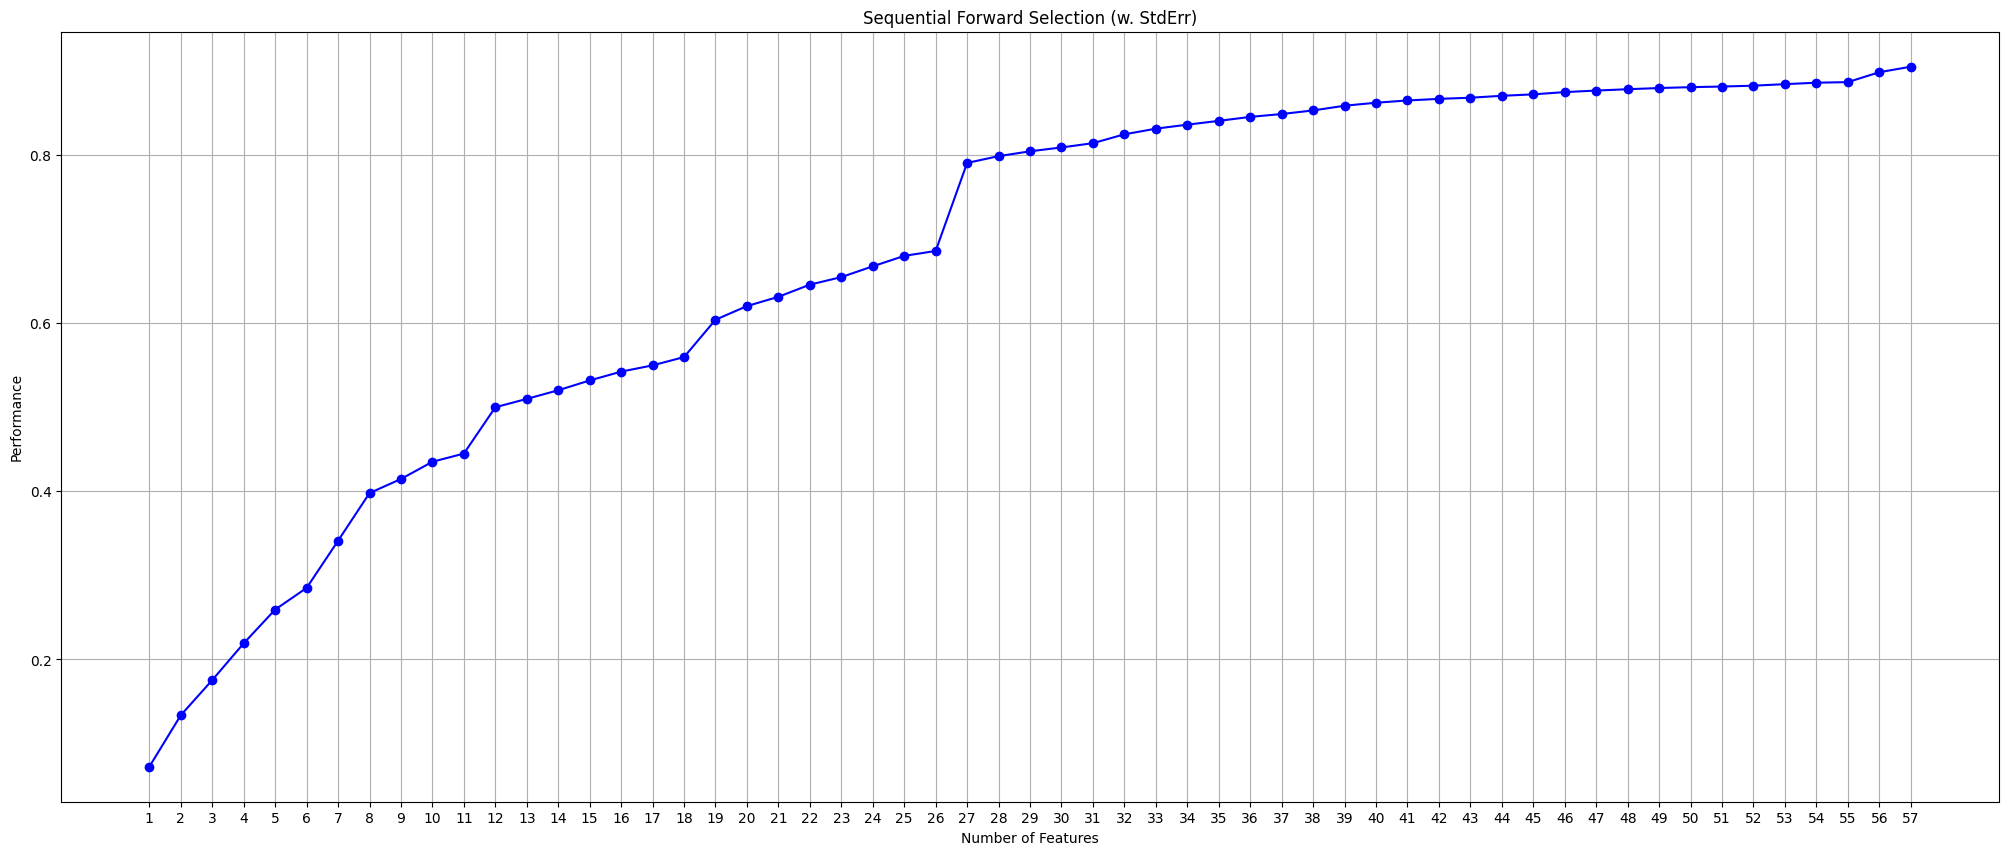

,feature_idx,cv_scores,avg_score,feature_names
1,"(53,)",[0.07238822605118933],0.072388,"(deferredRevenueNonCurrent,)"
2,"(2, 53)",[0.13364565134481698],0.133646,"(Number of Layoffs, deferredRevenueNonCurrent)"
3,"(2, 49, 53)",[0.1754551201136243],0.175455,"(Number of Layoffs, deferredRevenue, deferredR..."
4,"(2, 10, 49, 53)",[0.21917398183695092],0.219174,"(Number of Layoffs, otherExpenses, deferredRev..."
5,"(2, 10, 49, 53, 70)",[0.25931642013731415],0.259316,"(Number of Layoffs, otherExpenses, deferredRev..."
6,"(2, 10, 47, 49, 53, 70)",[0.28505660417031264],0.285057,"(Number of Layoffs, otherExpenses, shortTermDe..."
7,"(2, 10, 32, 47, 49, 53, 70)",[0.3411865641394545],0.341187,"(Number of Layoffs, otherExpenses, netReceivab..."
8,"(2, 10, 32, 47, 49, 53, 61, 70)",[0.3978826169888837],0.397883,"(Number of Layoffs, otherExpenses, netReceivab..."
9,"(2, 10, 32, 47, 49, 53, 61, 70, 82)",[0.4146598999106189],0.41466,"(Number of Layoffs, otherExpenses, netReceivab..."
10,"(2, 10, 32, 47, 49, 53, 61, 70, 71, 82)",[0.4351497179851682],0.43515,"(Number of Layoffs, otherExpenses, netReceivab..."


In [59]:
df_SFS_covid_results = forward_elimination_feature_selection(covid_df)
df_SFS_covid_results

/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Bhavya/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


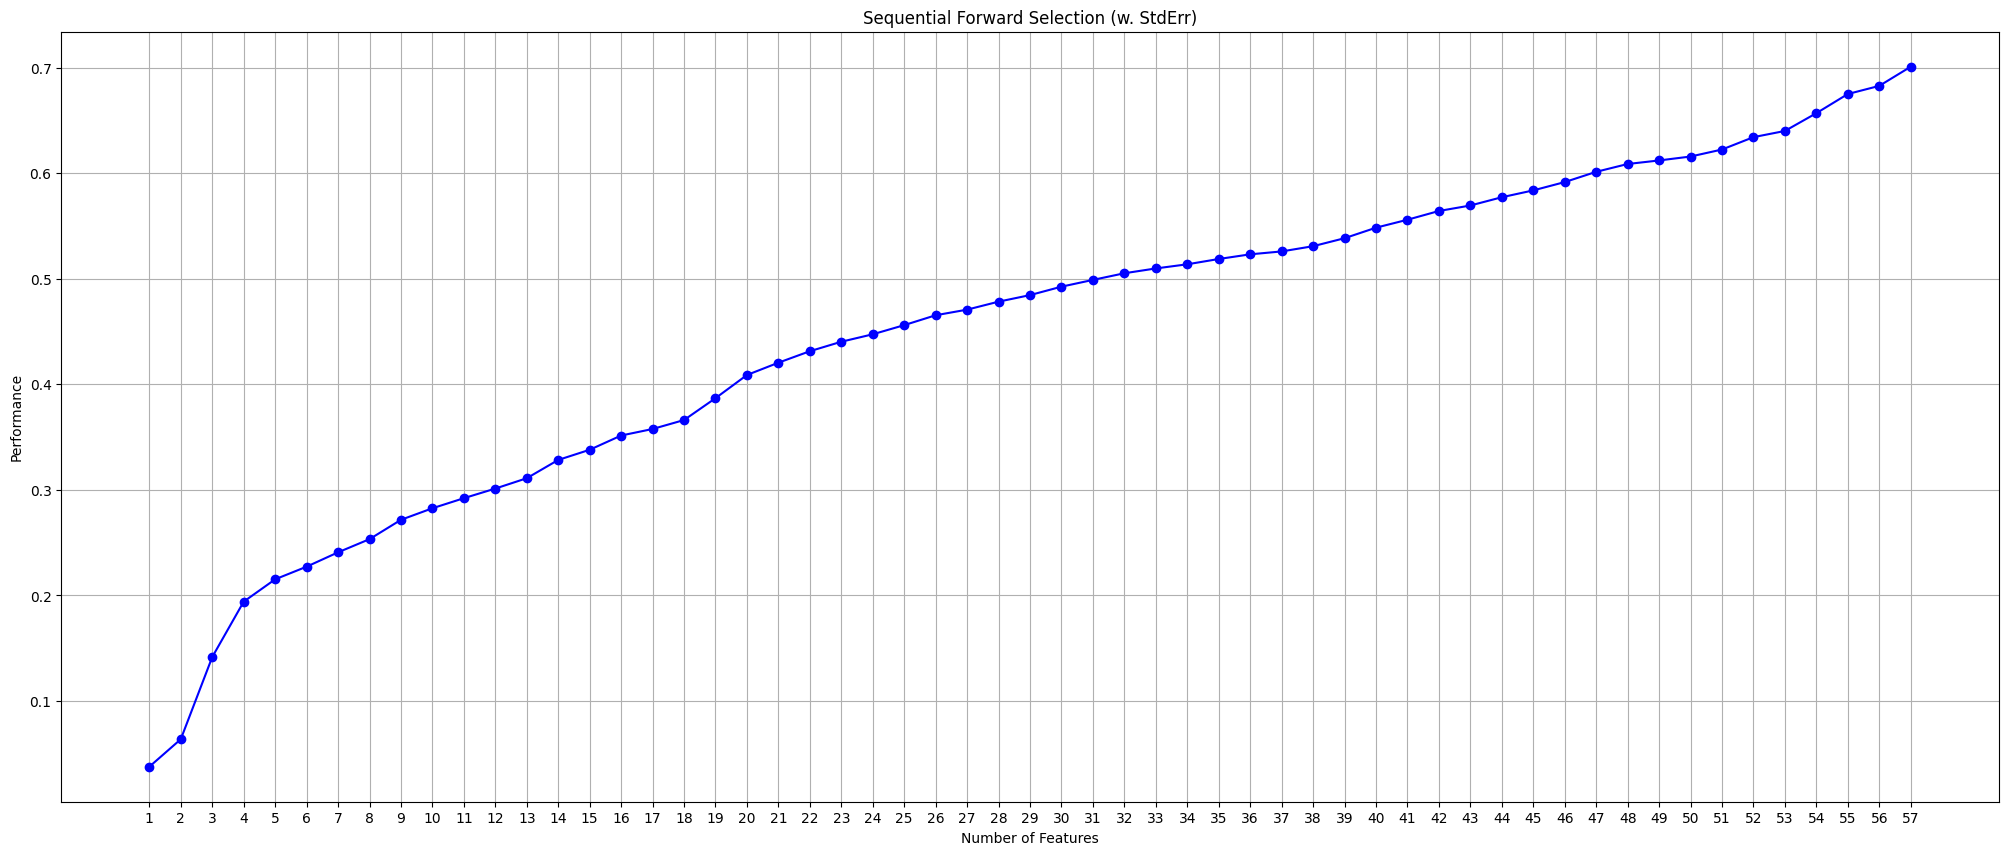

,feature_idx,cv_scores,avg_score,feature_names
1,"(101,)",[0.03774179114444709],0.037742,"(new_cases_smoothed,)"
2,"(2, 101)",[0.06381294370033408],0.063813,"(Number of Layoffs, new_cases_smoothed)"
3,"(2, 45, 101)",[0.1416469152670956],0.141647,"(Number of Layoffs, totalAssets, new_cases_smo..."
4,"(2, 45, 84, 101)",[0.19412045850902582],0.19412,"(Number of Layoffs, totalAssets, netCashUsedFo..."
5,"(2, 30, 45, 84, 101)",[0.21528894197766468],0.215289,"(Number of Layoffs, shortTermInvestments, tota..."
6,"(2, 10, 30, 45, 84, 101)",[0.2272405184379419],0.227241,"(Number of Layoffs, otherExpenses, shortTermIn..."
7,"(1, 2, 10, 30, 45, 84, 101)",[0.24083600465343236],0.240836,"(Quarter, Number of Layoffs, otherExpenses, sh..."
8,"(1, 2, 10, 30, 41, 45, 84, 101)",[0.2533193704783975],0.253319,"(Quarter, Number of Layoffs, otherExpenses, sh..."
9,"(1, 2, 10, 30, 41, 45, 84, 99, 101)",[0.27164792212759203],0.271648,"(Quarter, Number of Layoffs, otherExpenses, sh..."
10,"(1, 2, 7, 10, 30, 41, 45, 84, 99, 101)",[0.2825842731677678],0.282584,"(Quarter, Number of Layoffs, ResearchAndDevelo..."


In [60]:
df_SFS_postcovid_results = forward_elimination_feature_selection(postcovid_df)
df_SFS_postcovid_results

### Backward Elimination Feature Selection

In [89]:
def backward_elimination_feature_selection(inp_df):
    input_df = inp_df.drop(columns={'Number of Workers','percent_layoff','Unnamed: 0'})
    X = input_df
    y = inp_df['Number of Workers']

    #Build a logistic regression model 
    model = LinearRegression()
    #Define RFE 
    rfe = RFE(model, n_features_to_select=20, step=1)
    
    #Use RFE to select the top 5 features 
    fit = rfe.fit(X, y)

    #Create a dataframe for the results 
    df_RFE_results = []
    for i in range(X.shape[1]):
        df_RFE_results.append(
            {      
                'Feature_names': input_df.columns[i],
                'Selected':  rfe.support_[i],
                'RFE_ranking':  rfe.ranking_[i]
            }
        )

    df_RFE_results = pd.DataFrame(df_RFE_results)
    df_res = df_RFE_results[df_RFE_results['RFE_ranking']==1].reset_index().drop(columns={'index'})
    return df_res

In [90]:
backward_SFS_precovid_results = backward_elimination_feature_selection(precovid_df)
backward_SFS_precovid_results

,Feature_names,Selected,RFE_ranking
0,Year,True,1
1,Quarter,True,1
2,Number of Layoffs,True,1
3,grossProfitRatio,True,1
4,EBITDARatio,True,1
5,operatingIncomeRatio,True,1
6,incomeBeforeTaxRatio,True,1
7,netIncomeRatio,True,1
8,EPS,True,1
9,EPSDiluted,True,1


In [91]:
backward_SFS_covid_results = backward_elimination_feature_selection(covid_df)
backward_SFS_covid_results

,Feature_names,Selected,RFE_ranking
0,Year,True,1
1,Quarter,True,1
2,Number of Layoffs,True,1
3,grossProfitRatio,True,1
4,EBITDARatio,True,1
5,operatingIncomeRatio,True,1
6,incomeBeforeTaxRatio,True,1
7,netIncomeRatio,True,1
8,EPS,True,1
9,EPSDiluted,True,1


In [92]:
backward_SFS_postcovid_results = backward_elimination_feature_selection(postcovid_df)
backward_SFS_postcovid_results

,Feature_names,Selected,RFE_ranking
0,Year,True,1
1,Quarter,True,1
2,Number of Layoffs,True,1
3,grossProfitRatio,True,1
4,EBITDARatio,True,1
5,operatingIncomeRatio,True,1
6,incomeBeforeTaxRatio,True,1
7,netIncomeRatio,True,1
8,EPS,True,1
9,EPSDiluted,True,1


### Stepwise Feature Selection

In [95]:
def stepwise_elimination_feature_selection(inp_df):
    input_df = inp_df.drop(columns={'Number of Workers','percent_layoff','Unnamed: 0'})
    X = input_df
    y = inp_df['Number of Workers']

    #Define Sequential Forward Selection (sfs)
    sffs = SFS(LinearRegression(),
            k_features=20,
            forward=True,
            floating=True,
            scoring = 'r2',
            cv = 0)
    #Use SFS to select the top 5 features 
    feature_names=input_df.columns
    sffs.fit(X, y, feature_names)

    #Create a dataframe for the SFS results 
    df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
    return df_SFFS_results


In [96]:
stepwise_SFS_precovid_results = stepwise_elimination_feature_selection(precovid_df)
stepwise_SFS_precovid_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.12991232970209143],0.129912,"(Number of Layoffs,)"
2,"(2, 26)",[0.17134988704127074],0.17135,"(Number of Layoffs, EPSDiluted)"
3,"(2, 26, 86)",[0.18278179243171633],0.182782,"(Number of Layoffs, EPSDiluted, commonStockIss..."
4,"(2, 26, 38, 86)",[0.19422235669834054],0.194222,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
5,"(2, 26, 38, 69, 86)",[0.20254575826669685],0.202546,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
6,"(2, 26, 38, 60, 69, 86)",[0.20806218301984625],0.208062,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
7,"(2, 26, 38, 60, 69, 85, 86)",[0.22776148978210864],0.227761,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
8,"(2, 26, 38, 60, 69, 85, 86, 99)",[0.23439382697193734],0.234394,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
9,"(2, 26, 38, 60, 69, 85, 86, 94, 99)",[0.2394255884507388],0.239426,"(Number of Layoffs, EPSDiluted, intangibleAsse..."
10,"(2, 26, 38, 60, 62, 69, 85, 86, 94, 99)",[0.24332528936944686],0.243325,"(Number of Layoffs, EPSDiluted, intangibleAsse..."


In [97]:
stepwise_SFS_covid_results = stepwise_elimination_feature_selection(covid_df)
stepwise_SFS_covid_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(53,)",[0.07238822605118933],0.072388,"(deferredRevenueNonCurrent,)"
2,"(2, 53)",[0.13364565134481698],0.133646,"(Number of Layoffs, deferredRevenueNonCurrent)"
3,"(2, 49, 53)",[0.1754551201136243],0.175455,"(Number of Layoffs, deferredRevenue, deferredR..."
4,"(2, 10, 49, 53)",[0.21917398183695092],0.219174,"(Number of Layoffs, otherExpenses, deferredRev..."
5,"(2, 10, 49, 53, 70)",[0.25931642013731415],0.259316,"(Number of Layoffs, otherExpenses, deferredRev..."
6,"(2, 10, 47, 49, 53, 70)",[0.28505660417031264],0.285057,"(Number of Layoffs, otherExpenses, shortTermDe..."
7,"(2, 10, 32, 47, 49, 53, 70)",[0.3411865641394545],0.341187,"(Number of Layoffs, otherExpenses, netReceivab..."
8,"(2, 10, 32, 47, 49, 53, 61, 70)",[0.3978826169888837],0.397883,"(Number of Layoffs, otherExpenses, netReceivab..."
9,"(2, 10, 32, 47, 49, 53, 61, 70, 82)",[0.4146598999106189],0.41466,"(Number of Layoffs, otherExpenses, netReceivab..."
10,"(2, 10, 32, 47, 49, 53, 61, 70, 71, 82)",[0.4351497179851682],0.43515,"(Number of Layoffs, otherExpenses, netReceivab..."


In [98]:
stepwise_SFS_postcovid_results = stepwise_elimination_feature_selection(postcovid_df)
stepwise_SFS_postcovid_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(101,)",[0.03774179114444709],0.037742,"(new_cases_smoothed,)"
2,"(2, 101)",[0.06381294370033408],0.063813,"(Number of Layoffs, new_cases_smoothed)"
3,"(2, 45, 101)",[0.1416469152670956],0.141647,"(Number of Layoffs, totalAssets, new_cases_smo..."
4,"(2, 45, 84, 101)",[0.19412045850902582],0.19412,"(Number of Layoffs, totalAssets, netCashUsedFo..."
5,"(2, 30, 45, 84, 101)",[0.21528894197766468],0.215289,"(Number of Layoffs, shortTermInvestments, tota..."
6,"(2, 10, 30, 45, 84, 101)",[0.2272405184379419],0.227241,"(Number of Layoffs, otherExpenses, shortTermIn..."
7,"(1, 2, 10, 30, 45, 84, 101)",[0.24083600465343236],0.240836,"(Quarter, Number of Layoffs, otherExpenses, sh..."
8,"(1, 2, 10, 30, 41, 45, 84, 101)",[0.2533193704783975],0.253319,"(Quarter, Number of Layoffs, otherExpenses, sh..."
9,"(1, 2, 10, 30, 41, 45, 84, 99, 101)",[0.27164792212759203],0.271648,"(Quarter, Number of Layoffs, otherExpenses, sh..."
10,"(1, 2, 7, 10, 30, 41, 45, 84, 99, 101)",[0.2825842731677678],0.282584,"(Quarter, Number of Layoffs, ResearchAndDevelo..."
